## Download the dataset from Kaggle

In [10]:
import  kagglehub
path=kagglehub.dataset_download("techsash/waste-classification-data")
print("path to dataset files:",path)

path to dataset files: /kaggle/input/waste-classification-data


## Importing Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

##TRAIN and TEST PATH from DATSASET

In [12]:
train_path="/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path="/kaggle/input/waste-classification-data/DATASET/TEST"

## Preparing Image Data for CNN Training

1. Initializing Image and Label Lists

2. Iterating Through Image Categories and Files

    a. Loading Image with OpenCV

    b. Converting Color Space (BGR to RGB)

    c. Extracting Category Label

3. Creating Pandas DataFrame from Image Data and Labels
4. Preparing Training and Validation Datasets


In [13]:
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({"image":x_data,"label":y_data})

100%|██████████| 12565/12565 [00:31<00:00, 402.01it/s]


## Checking the Dataset Size

Displaying the Number of Samples (Images)


In [14]:
data.shape

(22564, 2)

## Generating a pie chart for the number of Organic and Recyclable waste

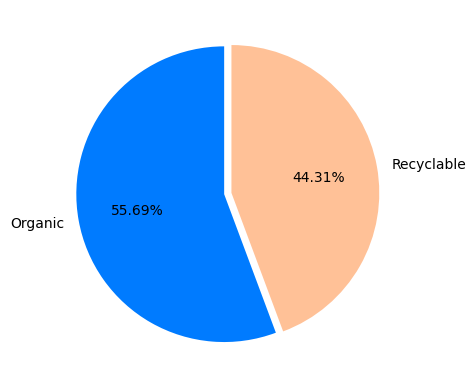

In [15]:
colors = ['#007BFF', '#FFC197']  # Blue and Amber
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()

## Visualizing Random Images from the Dataset

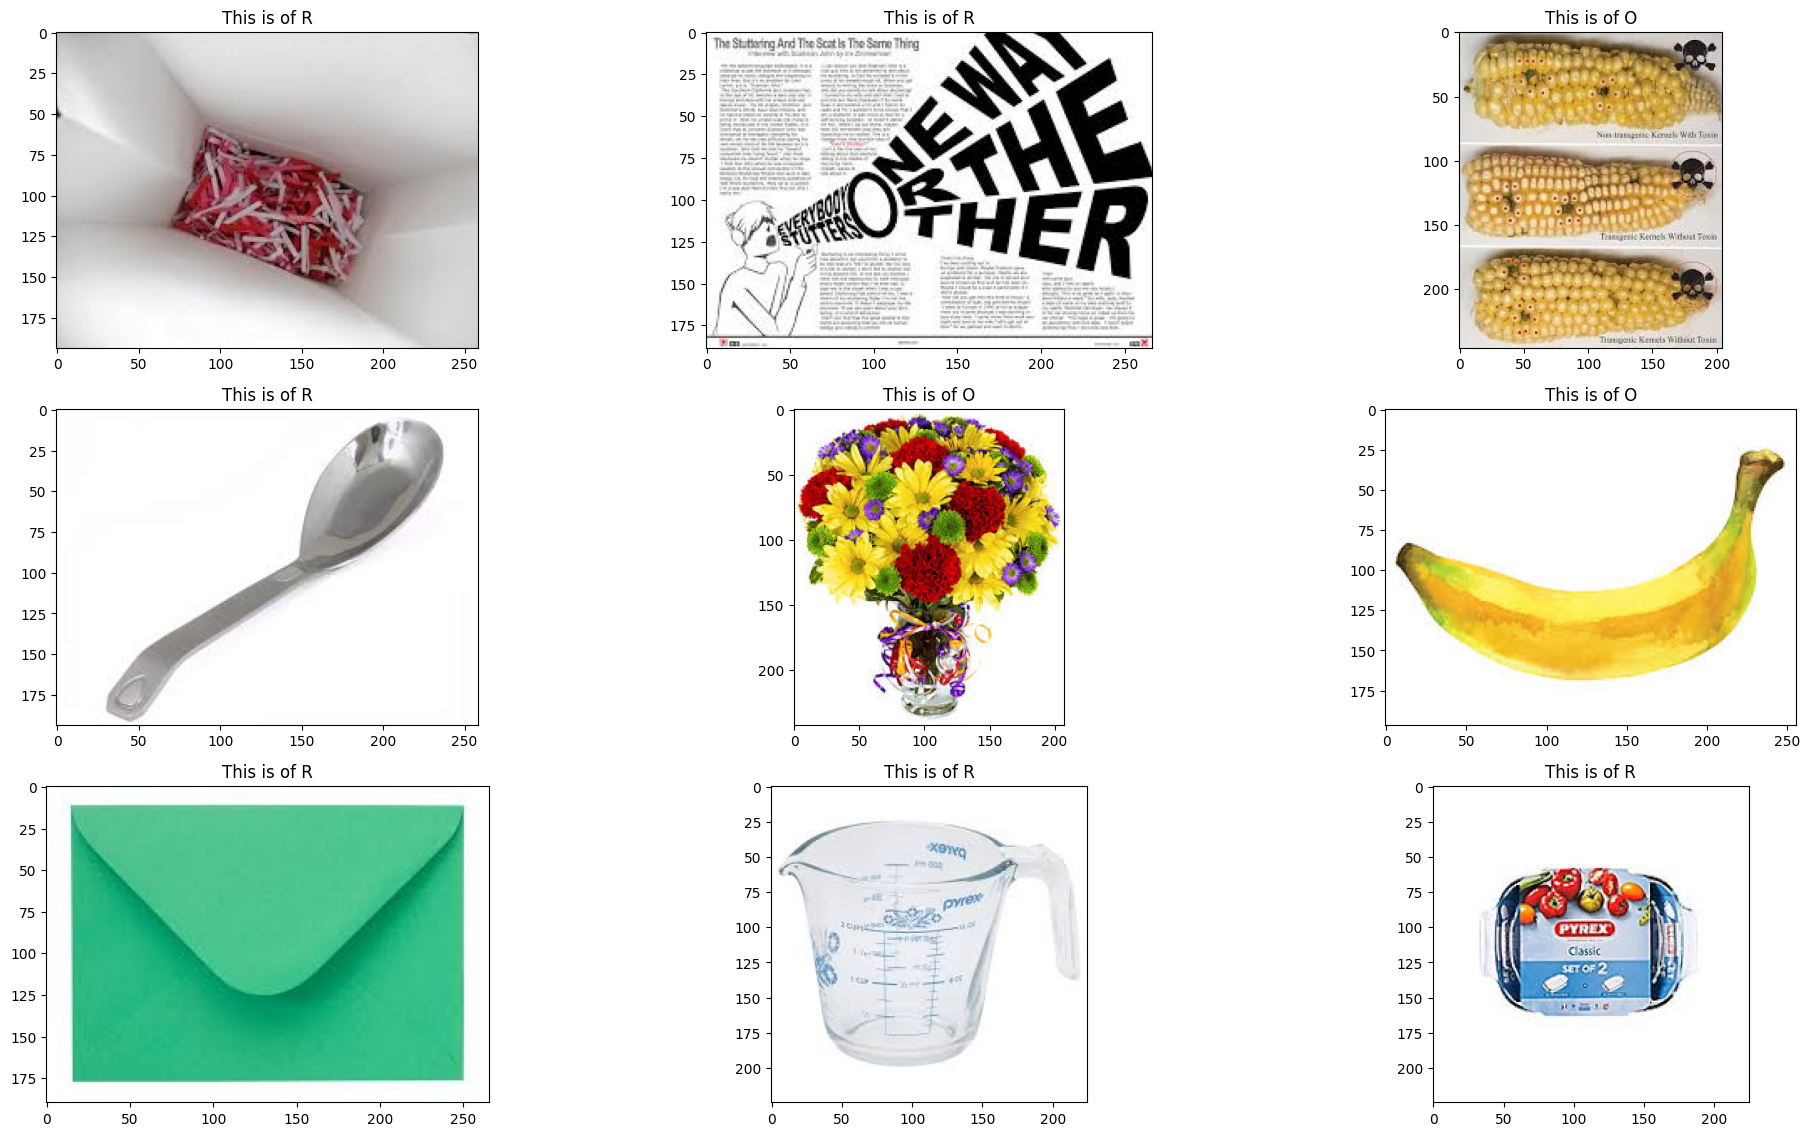

In [16]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i % 12) + 1)
    index = np.random.randint(15000)
    # Corrected the title format
    plt.title('This is of {}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

#  Building Convolutional Neural Network

Conv2D: Convolutional layers for feature extraction.

MaxPooling2D: Downsampling layers to reduce spatial dimensions.

Dense: Fully connected layers for classification.

Activation: Applies an activation function (e.g., ReLU, sigmoid) to the output of a layer.

Flatten: Converts a multi-dimensional tensor into a 1D vector for use in fully connected layers.

Dropout: Regularization technique to prevent overfitting.



In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Model  compilation

-loss=Binary_crossentropy
  
-optimizer=Adam



In [18]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size=32

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

 # Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increased rotation
    width_shift_range=0.3,    # Increased shift
    height_shift_range=0.3,   # Increased shift
    shear_range=0.3,          # Increased shear
    zoom_range=0.3,           # Increased zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Increased rotation
    width_shift_range=0.3,    # Increased shift
    height_shift_range=0.3,   # Increased shift
    shear_range=0.3,          # Increased shear
    zoom_range=0.3,           # Increased zoom
    horizontal_flip=True,
    fill_mode='nearest'
)


 # Data Generator

In [21]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


#  Model Training

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,baseline=0.4,min_delta=0.0001,restore_best_weights=True)

In [23]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
     epochs=16,
       callbacks=[callback])

Epoch 1/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 313s 425ms/step - accuracy: 0.7645 - loss: 0.5695 - val_accuracy: 0.7600 - val_loss: 0.4607
Epoch 2/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 282s 396ms/step - accuracy: 0.8162 - loss: 0.4369 - val_accuracy: 0.8691 - val_loss: 0.3419
Epoch 3/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 281s 394ms/step - accuracy: 0.8288 - loss: 0.4096 - val_accuracy: 0.8806 - val_loss: 0.3156
Epoch 4/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 282s 396ms/step - accuracy: 0.8424 - loss: 0.3872 - val_accuracy: 0.8731 - val_loss: 0.3086
Epoch 5/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 286s 402ms/step - accuracy: 0.8474 - loss: 0.3792 - val_accuracy: 0.8882 - val_loss: 0.3026
Epoch 6/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 281s 395ms/step - accuracy: 0.8479 - loss: 0.3764 - val_accuracy: 0.8786 - val_loss: 0.3005
Epoch 7/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 287s 403ms/step - accuracy: 0.8528 - loss: 0.3631 - val_accuracy: 0.8615 - val_loss: 0.3484
Epoch 8/16
706/706 ━━━━━━━━━━━━━━━━━━━━ 307s 431ms/step - accuracy: 0.8546 -

# Plotting Accuracy and loss graphs

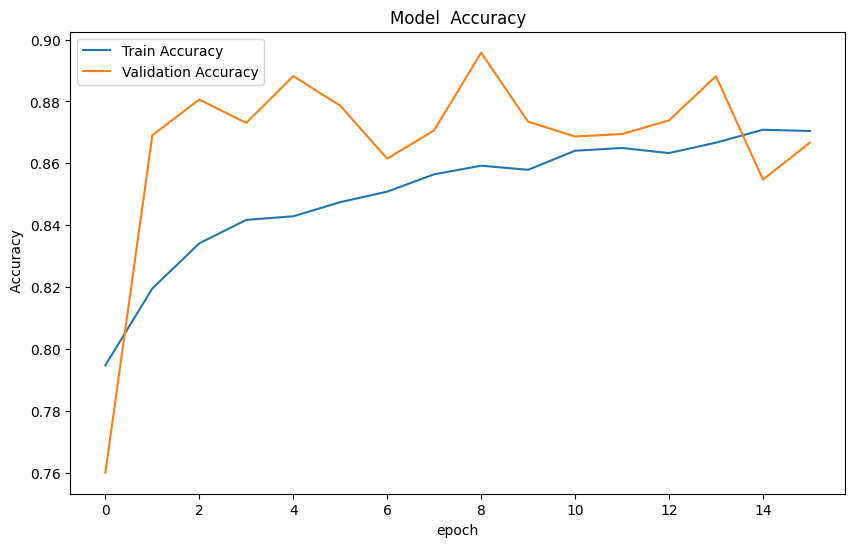

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model  Accuracy')
plt.ylabel(' Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

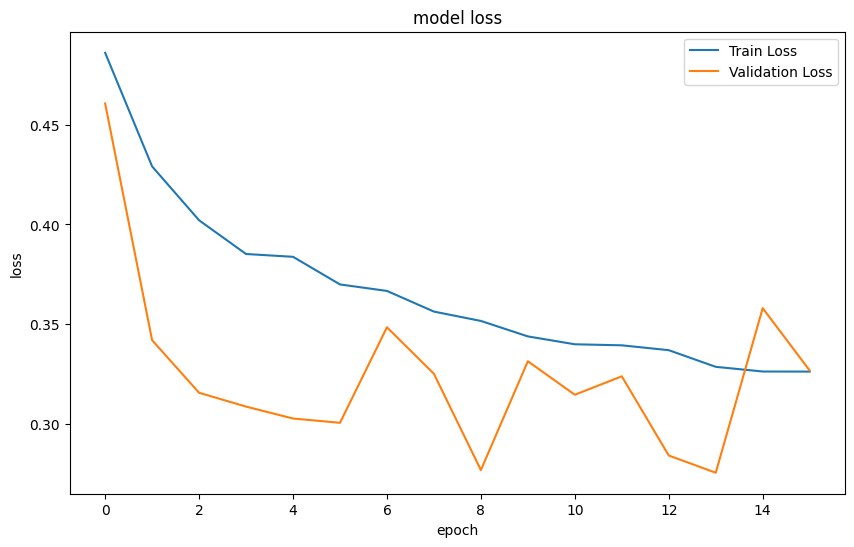

In [25]:
# summarize history for loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


# Model Performance Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

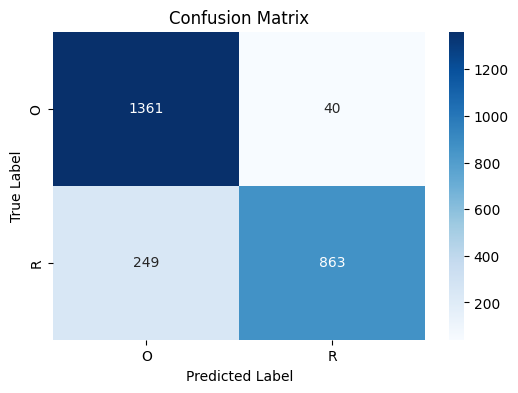

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Predict the labels for the test set
y_true = []
y_pred = []

# Get the ground truth labels and predictions from the test set
for i in range(len(test_generator)):
    batch_x, batch_y = test_generator[i]
    y_true.extend(np.argmax(batch_y, axis=1))  # Get true labels
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))  # Get predicted labels


# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



# Gradio Interface

In [27]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 29.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


In [28]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_waste(img):
    # Convert to correct color format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(6, 4))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Resize and reshape the image for the model
    img_resized = cv2.resize(img, (224, 224))
    img_resized = np.reshape(img_resized, [-1, 224, 224, 3])

    # Predict using the model
    prediction = model.predict(img_resized)
    result = np.argmax(prediction)

    # Ensure correct classification mapping
    categories = {0: "Organic", 1: "Recyclable"}  # Swap the labels if needed
    return f"The image shown is {categories.get(result)}"

# Gradio Interface
demo = gr.Interface(
    fn=predict_waste,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Textbox(),
    title="Waste Classification Model",
    description="Upload an image of waste to classify it as Recyclable or Organic."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://65e1b4f1711d0536a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
